In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/vet_data_clean.csv')

In [ ]:
df.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U,DemMedIncome_Missing
0,0,0.741937,1.410987,0.095310,1.131402,2.839078,2.610070,2.235376,2.839078,3.049273,4.191169,8,17,26,3,8,13,0,0,59.0,112179.202755,0,53513.457361,0,0,0,0,0,1,0,0,1
1,0,0.095310,2.091864,-2.302585,1.131402,3.000720,3.000720,2.771338,2.778819,3.261935,4.522875,14,35,79,5,5,24,0,23,67.0,186800.000000,85,53513.457361,0,0,0,0,0,1,0,0,0
2,1,1.808289,3.716008,1.131402,3.000720,1.808289,1.662030,1.342865,1.629241,2.895912,4.710431,12,23,51,5,11,22,1,0,54.5,87600.000000,36,38750.000000,0,0,0,0,1,1,1,0,1
3,1,1.131402,2.493205,1.131402,2.091864,2.312535,2.171337,2.151762,2.171337,2.208274,4.533674,14,22,44,2,6,16,1,0,50.0,139200.000000,27,38942.000000,1,0,0,0,0,1,1,0,1
4,0,0.095310,0.095310,0.095310,0.095310,3.000720,3.000720,3.000720,3.000720,3.049273,3.049273,10,15,13,4,7,6,0,35,53.0,168100.000000,37,71509.000000,0,1,0,0,0,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9683 entries, 0 to 9682
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TARGET_B              9683 non-null   int64  
 1   GiftCnt36             9683 non-null   float64
 2   GiftCntAll            9683 non-null   float64
 3   GiftCntCard36         9683 non-null   float64
 4   GiftCntCardAll        9683 non-null   float64
 5   GiftAvgLast           9683 non-null   float64
 6   GiftAvg36             9683 non-null   float64
 7   GiftAvgAll            9683 non-null   float64
 8   GiftAvgCard36         9683 non-null   float64
 9   GiftTimeLast          9683 non-null   float64
 10  GiftTimeFirst         9683 non-null   float64
 11  PromCnt12             9683 non-null   int64  
 12  PromCnt36             9683 non-null   int64  
 13  PromCntAll            9683 non-null   int64  
 14  PromCntCard12         9683 non-null   int64  
 15  PromCntCard36        

## **`DemCluster` Should be an Object (categorical)**

We want the model to learn which clusters are the most/least likely to donate as opposed to learning about the trend of a numeric variable.

In [ ]:
## check # of levels
df.DemCluster.value_counts()

40    432
36    401
24    400
35    384
27    331
12    323
49    323
18    321
13    309
30    262
14    248
39    242
0     239
11    236
45    228
43    227
51    220
16    201
41    197
46    196
28    194
2     191
44    185
8     182
17    178
10    175
20    171
21    165
53    158
3     153
42    140
25    135
34    132
23    131
31    125
22    125
1     121
38    118
15    108
26    100
37     99
48     96
5      95
47     86
7      78
29     72
32     72
9      70
50     70
6      53
33     52
4      51
19     50
52     32
Name: DemCluster, dtype: int64

In [ ]:
## Number of levels
df.DemCluster.nunique()

54

Dummy-encoding the `DemCluster` variable would add 53 model df.

In [ ]:
## let's change to type object (categorical)
df.DemCluster = df.DemCluster.astype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9683 entries, 0 to 9682
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TARGET_B              9683 non-null   int64  
 1   GiftCnt36             9683 non-null   float64
 2   GiftCntAll            9683 non-null   float64
 3   GiftCntCard36         9683 non-null   float64
 4   GiftCntCardAll        9683 non-null   float64
 5   GiftAvgLast           9683 non-null   float64
 6   GiftAvg36             9683 non-null   float64
 7   GiftAvgAll            9683 non-null   float64
 8   GiftAvgCard36         9683 non-null   float64
 9   GiftTimeLast          9683 non-null   float64
 10  GiftTimeFirst         9683 non-null   float64
 11  PromCnt12             9683 non-null   int64  
 12  PromCnt36             9683 non-null   int64  
 13  PromCntAll            9683 non-null   int64  
 14  PromCntCard12         9683 non-null   int64  
 15  PromCntCard36        

## **Create Dummy-Encoding for ALL levels of `DemCluster`**

This is not recommended b/c we would add 53 model df.

In [ ]:
df_not_recommended = pd.get_dummies(df, drop_first = True)

<ipython-input-10-ce3f642ac0eb>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_not_recommended = pd.get_dummies(df, drop_first = True)


In [ ]:
df_not_recommended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9683 entries, 0 to 9682
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TARGET_B              9683 non-null   int64  
 1   GiftCnt36             9683 non-null   float64
 2   GiftCntAll            9683 non-null   float64
 3   GiftCntCard36         9683 non-null   float64
 4   GiftCntCardAll        9683 non-null   float64
 5   GiftAvgLast           9683 non-null   float64
 6   GiftAvg36             9683 non-null   float64
 7   GiftAvgAll            9683 non-null   float64
 8   GiftAvgCard36         9683 non-null   float64
 9   GiftTimeLast          9683 non-null   float64
 10  GiftTimeFirst         9683 non-null   float64
 11  PromCnt12             9683 non-null   int64  
 12  PromCnt36             9683 non-null   int64  
 13  PromCntAll            9683 non-null   int64  
 14  PromCntCard12         9683 non-null   int64  
 15  PromCntCard36        

In [ ]:
df_not_recommended.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U,DemMedIncome_Missing,DemCluster_1,DemCluster_2,DemCluster_3,DemCluster_4,DemCluster_5,DemCluster_6,DemCluster_7,DemCluster_8,DemCluster_9,DemCluster_10,DemCluster_11,DemCluster_12,DemCluster_13,DemCluster_14,DemCluster_15,DemCluster_16,DemCluster_17,DemCluster_18,DemCluster_19,DemCluster_20,DemCluster_21,DemCluster_22,DemCluster_23,DemCluster_24,DemCluster_25,DemCluster_26,DemCluster_27,DemCluster_28,DemCluster_29,DemCluster_30,DemCluster_31,DemCluster_32,DemCluster_33,DemCluster_34,DemCluster_35,DemCluster_36,DemCluster_37,DemCluster_38,DemCluster_39,DemCluster_40,DemCluster_41,DemCluster_42,DemCluster_43,DemCluster_44,DemCluster_45,DemCluster_46,DemCluster_47,DemCluster_48,DemCluster_49,DemCluster_50,DemCluster_51,DemCluster_52,DemCluster_53
0,0,0.741937,1.410987,0.095310,1.131402,2.839078,2.610070,2.235376,2.839078,3.049273,4.191169,8,17,26,3,8,13,0,59.0,112179.202755,0,53513.457361,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.095310,2.091864,-2.302585,1.131402,3.000720,3.000720,2.771338,2.778819,3.261935,4.522875,14,35,79,5,5,24,0,67.0,186800.000000,85,53513.457361,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.808289,3.716008,1.131402,3.000720,1.808289,1.662030,1.342865,1.629241,2.895912,4.710431,12,23,51,5,11,22,1,54.5,87600.000000,36,38750.000000,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.131402,2.493205,1.131402,2.091864,2.312535,2.171337,2.151762,2.171337,2.208274,4.533674,14,22,44,2,6,16,1,50.0,139200.000000,27,38942.000000,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.095310,0.095310,0.095310,0.095310,3.000720,3.000720,3.000720,3.000720,3.049273,3.049273,10,15,13,4,7,6,0,53.0,168100.000000,37,71509.000000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Dimension Reduction by Keeping the Top Levels**

Let's keep the levels with the most donors only.

In [ ]:
## Value Counts are ranked from most values to least
df.DemCluster.value_counts()

40    432
36    401
24    400
35    384
27    331
12    323
49    323
18    321
13    309
30    262
14    248
39    242
0     239
11    236
45    228
43    227
51    220
16    201
41    197
46    196
28    194
2     191
44    185
8     182
17    178
10    175
20    171
21    165
53    158
3     153
42    140
25    135
34    132
23    131
31    125
22    125
1     121
38    118
15    108
26    100
37     99
48     96
5      95
47     86
7      78
29     72
32     72
9      70
50     70
6      53
33     52
4      51
19     50
52     32
Name: DemCluster, dtype: int64

<Axes: >

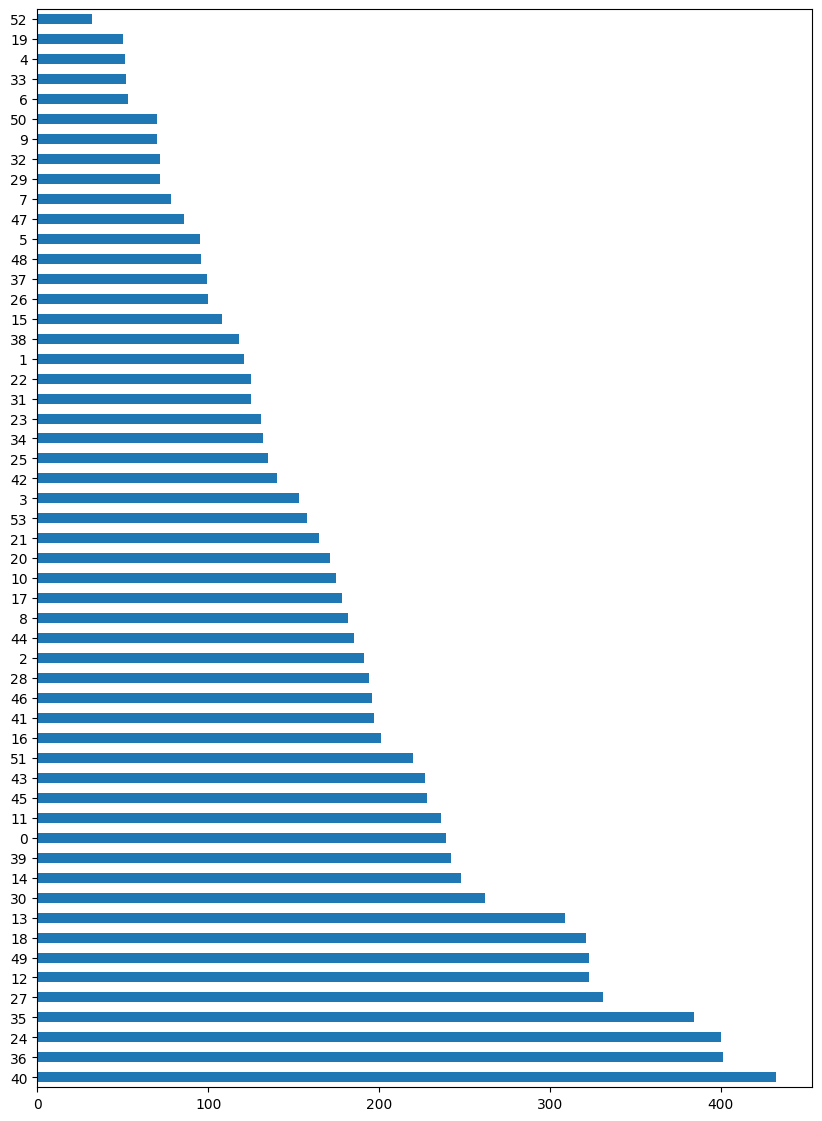

In [ ]:
df.DemCluster.value_counts().plot.barh(figsize = (10,14))

In [ ]:
## Let's keep the top 4
## Cluster 40, 36, 24, 35
## Create 4 dummy variables -
## You don't need to create the "other" category - Group the rest in an "other" category
df['DemCluster40'] = (df['DemCluster'] == 40).astype('int')
df['DemCluster36'] = (df['DemCluster'] == 36).astype('int')
df['DemCluster24'] = (df['DemCluster'] == 24).astype('int')
df['DemCluster35'] = (df['DemCluster'] == 35).astype('int')

## remove original variable DemCluster
df.drop('DemCluster', axis = 1, inplace = True)

In [ ]:
df.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U,DemMedIncome_Missing,DemCluster40,DemCluster36,DemCluster24,DemCluster35
0,0,0.741937,1.410987,0.095310,1.131402,2.839078,2.610070,2.235376,2.839078,3.049273,4.191169,8,17,26,3,8,13,0,59.0,112179.202755,0,53513.457361,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0.095310,2.091864,-2.302585,1.131402,3.000720,3.000720,2.771338,2.778819,3.261935,4.522875,14,35,79,5,5,24,0,67.0,186800.000000,85,53513.457361,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1.808289,3.716008,1.131402,3.000720,1.808289,1.662030,1.342865,1.629241,2.895912,4.710431,12,23,51,5,11,22,1,54.5,87600.000000,36,38750.000000,0,0,0,0,1,1,1,0,1,0,0,0,0
3,1,1.131402,2.493205,1.131402,2.091864,2.312535,2.171337,2.151762,2.171337,2.208274,4.533674,14,22,44,2,6,16,1,50.0,139200.000000,27,38942.000000,1,0,0,0,0,1,1,0,1,0,0,0,0
4,0,0.095310,0.095310,0.095310,0.095310,3.000720,3.000720,3.000720,3.000720,3.049273,3.049273,10,15,13,4,7,6,0,53.0,168100.000000,37,71509.000000,0,1,0,0,0,1,1,0,0,0,0,0,1


## **Combining Similar Levels**

You can use domain knowledge to combine levels that are similar. Cluster analysis can help.

## **Using a Model to Determine Most Important Levels**

* I need only the `DemCluster` as a predictor
* The y variable is the `TARGET_B`
* We need a model that tells us the most important levels (Decision Trees or Ensembles)
* Ensembles are preferred b/c you fit multiple DT (RF, Boosting, GB)



In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/vet_data_clean.csv')

In [ ]:
## Just need DemCluster and TARGET_B
X = pd.get_dummies(df['DemCluster']) ## one-hot encoding for ALL levels
y = df.TARGET_B

In [ ]:
## Let's fit an ensemble and get the feature importances
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier()
## fit
rf.fit(X, y)
## get the feature importances
rf.feature_importances_

array([0.05394367, 0.02080287, 0.01118813, 0.0204965 , 0.01563178,
       0.00798617, 0.01787419, 0.01364147, 0.02869724, 0.00735429,
       0.06039238, 0.01564302, 0.00880032, 0.03143226, 0.00780797,
       0.00814009, 0.00883971, 0.01048575, 0.01379739, 0.00748368,
       0.01574716, 0.01924038, 0.00673158, 0.01440027, 0.02007593,
       0.0133571 , 0.00712449, 0.00906372, 0.02958632, 0.01050954,
       0.05660509, 0.00739827, 0.03553338, 0.00562151, 0.00805656,
       0.01343584, 0.02314926, 0.02281437, 0.01170331, 0.00747042,
       0.02833213, 0.03414514, 0.01047003, 0.01705778, 0.05388551,
       0.01885062, 0.01052459, 0.0282256 , 0.00715759, 0.02303642,
       0.00862969, 0.01768848, 0.01570016, 0.0182329 ])

In [ ]:
feature_importances = pd.DataFrame({'levels': X.columns, 'importances': rf.feature_importances_})
feature_importances.set_index('levels', inplace = True)
feature_importances = feature_importances.sort_values(by = 'importances', ascending = False)

In [ ]:
feature_importances

,importances
levels,
10,0.060392
30,0.056605
0,0.053944
44,0.053886
32,0.035533
41,0.034145
13,0.031432
28,0.029586
8,0.028697


In [ ]:
## Create Dummy Variables for Clusters 10, 30, 0, 44
df['DemCluster10'] = (df['DemCluster'] == 10).astype('int')
df['DemCluster30'] = (df['DemCluster'] == 30).astype('int')
df['DemCluster0'] = (df['DemCluster'] == 0).astype('int')
df['DemCluster44'] = (df['DemCluster'] == 44).astype('int')

## remove original variable DemCluster
df.drop('DemCluster', axis = 1, inplace = True)

In [ ]:
df.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U,DemMedIncome_Missing,DemCluster10,DemCluster30,DemCluster0,DemCluster44
0,0,0.741937,1.410987,0.095310,1.131402,2.839078,2.610070,2.235376,2.839078,3.049273,4.191169,8,17,26,3,8,13,0,59.0,112179.202755,0,53513.457361,0,0,0,0,0,1,0,0,1,0,0,1,0
1,0,0.095310,2.091864,-2.302585,1.131402,3.000720,3.000720,2.771338,2.778819,3.261935,4.522875,14,35,79,5,5,24,0,67.0,186800.000000,85,53513.457361,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1.808289,3.716008,1.131402,3.000720,1.808289,1.662030,1.342865,1.629241,2.895912,4.710431,12,23,51,5,11,22,1,54.5,87600.000000,36,38750.000000,0,0,0,0,1,1,1,0,1,0,0,1,0
3,1,1.131402,2.493205,1.131402,2.091864,2.312535,2.171337,2.151762,2.171337,2.208274,4.533674,14,22,44,2,6,16,1,50.0,139200.000000,27,38942.000000,1,0,0,0,0,1,1,0,1,0,0,1,0
4,0,0.095310,0.095310,0.095310,0.095310,3.000720,3.000720,3.000720,3.000720,3.049273,3.049273,10,15,13,4,7,6,0,53.0,168100.000000,37,71509.000000,0,1,0,0,0,1,1,0,0,0,0,0,0


## **Data is Ready for Modeling Now**

If a variable is an object, any model will result in an error. Example

* *ERROR* `Status N` is not numeric

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9683 entries, 0 to 9682
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TARGET_B              9683 non-null   int64  
 1   GiftCnt36             9683 non-null   float64
 2   GiftCntAll            9683 non-null   float64
 3   GiftCntCard36         9683 non-null   float64
 4   GiftCntCardAll        9683 non-null   float64
 5   GiftAvgLast           9683 non-null   float64
 6   GiftAvg36             9683 non-null   float64
 7   GiftAvgAll            9683 non-null   float64
 8   GiftAvgCard36         9683 non-null   float64
 9   GiftTimeLast          9683 non-null   float64
 10  GiftTimeFirst         9683 non-null   float64
 11  PromCnt12             9683 non-null   int64  
 12  PromCnt36             9683 non-null   int64  
 13  PromCntAll            9683 non-null   int64  
 14  PromCntCard12         9683 non-null   int64  
 15  PromCntCard36        

In [ ]:
## Create your X matrix, y vector
X = df.drop(['TARGET_B'], axis = 1)
y = df.TARGET_B

In [ ]:
##
rf.fit(X, y)

RandomForestClassifier()

## **How to get the Variances and Covariances**

We want to do this with the predictors only.

In [ ]:
## how to get the variances and covariances at the same time
X.cov()

,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U,DemMedIncome_Missing,DemCluster10,DemCluster30,DemCluster0,DemCluster44
GiftCnt36,0.515516,0.369360,0.600828,0.411399,-0.171240,0.008907,-0.179949,-0.149013,-0.038280,0.117035,0.555086,2.577098,4.647930,0.341258,2.120445,1.999164,0.153018,0.831907,-4.024787e+03,0.212870,-4.754027e+02,-0.004805,-0.060567,-0.000557,-0.029645,1.405556e-01,0.009422,-0.008749,0.000558,0.000052,-0.000237,2.378710e-03,0.001099,-0.000450
GiftCntAll,0.369360,0.867246,0.366975,0.886474,-0.208402,-0.146018,-0.257512,-0.154151,-0.057308,0.501616,1.374011,4.508767,18.373596,0.402392,2.259730,6.922313,0.321111,2.706324,-6.485987e+03,0.161512,-8.391387e+02,-0.006865,-0.119811,0.000474,-0.074041,2.085099e-01,0.011361,-0.015496,0.005209,-0.027787,-0.002223,9.524763e-04,0.005947,0.000045
GiftCntCard36,0.600828,0.366975,1.610248,0.726856,-0.234134,-0.096452,-0.192301,-0.125611,-0.046222,0.038566,0.758064,2.181080,3.421170,0.397540,4.551778,1.509561,0.193463,0.547775,-2.671218e+03,0.200180,1.474658e+02,-0.006106,-0.041428,-0.002607,-0.001654,1.810336e-01,0.011087,-0.011617,0.004099,0.010918,-0.003285,2.976326e-05,0.001856,0.000243
GiftCntCardAll,0.411399,0.886474,0.726856,1.250353,-0.215561,-0.100086,-0.268846,-0.126343,-0.042734,0.528323,1.090961,4.250619,18.771140,0.373712,2.903545,7.332298,0.370190,2.693554,-4.622300e+03,0.204162,-2.890822e+02,-0.004870,-0.116905,-0.000010,-0.068372,2.275412e-01,0.004562,-0.012753,0.008849,-0.031092,-0.003860,2.457312e-04,0.005345,0.000113
GiftAvgLast,-0.171240,-0.208402,-0.234134,-0.215561,0.398780,0.263704,0.236098,0.215588,0.040738,-0.064820,-0.117922,-0.357749,-1.937907,-0.011610,-0.486185,-0.745905,-0.095429,-0.661559,6.803549e+03,-0.118552,8.567719e+02,0.000990,0.021526,0.001538,0.007143,-8.696326e-02,-0.009991,0.010763,-0.001420,-0.006638,-0.000544,-2.217573e-03,0.000299,-0.000174
GiftAvg36,0.008907,-0.146018,-0.096452,-0.100086,0.263704,0.553137,0.212176,0.227593,0.020110,-0.035429,-0.059612,0.638647,-0.909794,0.034545,-0.058997,-0.304559,-0.074673,-0.473938,6.211167e+03,-0.023326,6.552782e+02,0.002664,0.021409,0.001835,-0.005194,-6.970015e-02,-0.009557,0.012082,-0.003213,-0.005789,-0.000087,-2.502320e-03,0.000123,-0.000794
GiftAvgAll,-0.179949,-0.257512,-0.192301,-0.268846,0.236098,0.212176,0.260861,0.204473,0.014791,-0.120110,0.094978,-0.565370,-2.971916,-0.026895,-0.527101,-1.323389,-0.108782,-0.715423,7.182563e+03,-0.193038,8.625340e+02,0.001568,0.037886,0.001256,0.017596,-8.473640e-02,-0.005753,0.013810,-0.001128,0.001075,0.000269,-3.212172e-03,0.001171,-0.000616
GiftAvgCard36,-0.149013,-0.154151,-0.125611,-0.126343,0.215588,0.227593,0.204473,0.276147,0.015223,-0.044160,0.096878,-0.157004,-0.896732,-0.009204,-0.188120,-0.457257,-0.072692,-0.219971,5.727883e+03,-0.081325,8.002182e+02,-0.000026,0.023683,0.001303,0.008268,-6.742625e-02,-0.006944,0.009453,-0.000368,0.000812,-0.000758,-2.769975e-03,0.000928,-0.000621
GiftTimeLast,-0.038280,-0.057308,-0.046222,-0.042734,0.040738,0.020110,0.014791,0.015223,0.089914,-0.011275,-0.856474,-0.866794,-1.719892,-0.146422,-0.242154,-0.366085,-0.017851,-0.353455,1.831751e+01,0.177350,6.992136e+01,-0.001776,-0.000961,-0.000745,0.003505,-1.411211e-02,-0.006101,-0.001669,-0.000537,-0.004127,-0.000428,6.887404e-04,-0.005279,0.000708
GiftTimeFirst,0.117035,0.501616,0.038566,0.528323,-0.064820,-0.035429,-0.120110,-0.044160,-0.011275,0.393540,0.505095,2.512410,12.562954,0.148640,0.938091,4.886035,0.166692,1.891652,-3.140846e+03,0.152110,-3.510375e+02,-0.005564,-0.078601,0.000987,-0.055324,9.917964e-02,-0.002422,-0.005154,0.004679,-0.030009,-0.001516,4.185191e-04,0.002568,0.001024


In [ ]:
## Correlation
X.corr()

,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U,DemMedIncome_Missing,DemCluster10,DemCluster30,DemCluster0,DemCluster44
GiftCnt36,1.000000,0.552405,0.659451,0.512420,-0.377675,0.016680,-0.490710,-0.394942,-0.177804,0.259836,0.160722,0.460045,0.280786,0.359035,0.646027,0.325194,0.427630,0.078233,-0.057200,0.026028,-0.038429,-0.044228,-0.334701,-0.013118,-0.174979,0.455620,0.026405,-0.024819,0.003394,0.000169,-0.002478,0.020418,0.009863,-0.004578
GiftCntAll,0.552405,1.000000,0.310541,0.851292,-0.354375,-0.210824,-0.541404,-0.314996,-0.205224,0.858630,0.306729,0.620550,0.855776,0.326402,0.530799,0.868151,0.691880,0.196220,-0.071069,0.015226,-0.052298,-0.048715,-0.510466,0.008610,-0.336940,0.521112,0.024547,-0.033891,0.024415,-0.069065,-0.017916,0.006303,0.041156,0.000350
GiftCntCard36,0.659451,0.310541,1.000000,0.512254,-0.292181,-0.102199,-0.296709,-0.188369,-0.121477,0.048446,0.124193,0.220301,0.116941,0.236652,0.784656,0.138938,0.305914,0.029147,-0.021480,0.013849,0.006745,-0.031803,-0.129534,-0.034727,-0.005525,0.332039,0.017581,-0.018646,0.014102,0.019916,-0.019434,0.000145,0.009424,0.001398
GiftCntCardAll,0.512420,0.851292,0.512254,1.000000,-0.305273,-0.120349,-0.470742,-0.215013,-0.127450,0.753163,0.202829,0.487221,0.728134,0.252462,0.568011,0.765842,0.664287,0.162646,-0.042181,0.016029,-0.015005,-0.028785,-0.414819,-0.000147,-0.259126,0.473608,0.008209,-0.023229,0.034545,-0.064361,-0.025913,0.001354,0.030808,0.000738
GiftAvgLast,-0.377675,-0.354375,-0.292181,-0.305273,1.000000,0.561480,0.732016,0.649664,0.215139,-0.163625,-0.038821,-0.072611,-0.133108,-0.013888,-0.168415,-0.137953,-0.303221,-0.070735,0.109937,-0.016482,0.078745,0.010364,0.135252,0.041171,0.047938,-0.320513,-0.031836,0.034713,-0.009813,-0.024332,-0.006461,-0.021642,0.003047,-0.002008
GiftAvg36,0.016680,-0.210824,-0.102199,-0.120349,0.561480,1.000000,0.558568,0.582334,0.090175,-0.075936,-0.016663,0.110061,-0.053060,0.035087,-0.017352,-0.047827,-0.201463,-0.043027,0.085218,-0.002753,0.051137,0.023675,0.114213,0.041703,-0.029597,-0.218119,-0.025856,0.033086,-0.018855,-0.018018,-0.000879,-0.020736,0.001063,-0.007795
GiftAvgAll,-0.490710,-0.541404,-0.296709,-0.470742,0.732016,0.558568,1.000000,0.761835,0.096579,-0.374868,0.038659,-0.141879,-0.252388,-0.039778,-0.225753,-0.302620,-0.427364,-0.094578,0.143499,-0.033181,0.098015,0.020283,0.294319,0.041572,0.146005,-0.386137,-0.022666,0.055073,-0.009641,0.004872,0.003946,-0.038760,0.014782,-0.008804
GiftAvgCard36,-0.394942,-0.314996,-0.188369,-0.215013,0.649664,0.582334,0.761835,1.000000,0.096612,-0.133958,0.038326,-0.038294,-0.074017,-0.013230,-0.078309,-0.101626,-0.277566,-0.028264,0.111224,-0.013586,0.088381,-0.000332,0.178817,0.041907,0.066678,-0.298631,-0.026591,0.036640,-0.003061,0.003575,-0.010823,-0.032486,0.011375,-0.008629
GiftTimeLast,-0.177804,-0.205224,-0.121477,-0.127450,0.215139,0.090175,0.096579,0.096612,1.000000,-0.059937,-0.593796,-0.370504,-0.248786,-0.368864,-0.176654,-0.142588,-0.119455,-0.079589,0.000623,0.051924,0.013534,-0.039132,-0.012716,-0.041974,0.049532,-0.109535,-0.040939,-0.011337,-0.007816,-0.031855,-0.010721,0.014156,-0.113451,0.017241
GiftTimeFirst,0.259836,0.858630,0.048446,0.753163,-0.163625,-0.075936,-0.374868,-0.133958,-0.059937,1.000000,0.167384,0.513318,0.868629,0.178985,0.327111,0.909656,0.533173,0.203601,-0.051089,0.021287,-0.032477,-0.058611,-0.497131,0.026610,-0.373737,0.367963,-0.007770,-0.016734,0.032558,-0.110722,-0.018139,0.004112,0.026385,0.011919
